In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kartik2112_fraud_detection_path = kagglehub.dataset_download('kartik2112/fraud-detection')

print('Data source import complete.')


100%|██████████| 202M/202M [00:03<00:00, 59.3MB/s]

Extracting files...


Data source import complete.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

    loading the dataset

In [3]:
import os
# List all files in the dataset directory
print(os.listdir(kartik2112_fraud_detection_path))
import pandas as pd

# Construct the full file path (adjust the filename if needed)
file_path = os.path.join(kartik2112_fraud_detection_path, 'fraudTrain.csv')
data = pd.read_csv(file_path)

# Verify by checking the first few rows
data.head()

['fraudTest.csv', 'fraudTrain.csv']


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


1. About this file

2. Suggest Edits
3. Training set for Credit Card Transactions
4. index - Unique Identifier for each row
5. trans_date_trans_time - Transaction DateTime
6. cc_num - Credit Card Number of Customer
7. merchant - Merchant Name
8. category - Category of Merchant
9. amt - Amount of Transaction
10. first - First Name of Credit Card Holder
11. last - Last Name of Credit Card Holder
12. gender - Gender of Credit Card Holder
13. street - Street Address of Credit Card Holder
14. city - City of Credit Card Holder
15. state - State of Credit Card Holder
16. zip - Zip of Credit Card Holder
17. lat - Latitude Location of Credit Card Holder
18. long - Longitude Location of Credit Card Holder
19. city_pop - Credit Card Holder's City Population
20. job - Job of Credit Card Holder
21. dob - Date of Birth of Credit Card Holder
22. trans_num - Transaction Number
23. unix_time - UNIX Time of transaction
24. merch_lat - Latitude Location of Merchant
25. merch_long - Longitude Location of Merchant
26. is_fraud - Fraud Flag <--- Target Class

Feature Engineering

In [5]:
data.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [6]:
for col in data.columns:
    print(f"No. of Unique values in {col} is {len(data[col].unique())}")


No. of Unique values in Unnamed: 0 is 1296675
No. of Unique values in trans_date_trans_time is 1274791
No. of Unique values in cc_num is 983
No. of Unique values in merchant is 693
No. of Unique values in category is 14
No. of Unique values in amt is 52928
No. of Unique values in first is 352
No. of Unique values in last is 481
No. of Unique values in gender is 2
No. of Unique values in street is 983
No. of Unique values in city is 894
No. of Unique values in state is 51
No. of Unique values in zip is 970
No. of Unique values in lat is 968
No. of Unique values in long is 969
No. of Unique values in city_pop is 879
No. of Unique values in job is 494
No. of Unique values in dob is 968
No. of Unique values in trans_num is 1296675
No. of Unique values in unix_time is 1274823
No. of Unique values in merch_lat is 1247805
No. of Unique values in merch_long is 1275745
No. of Unique values in is_fraud is 2


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Data Cleaning

In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)


In [10]:
data.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


# EDA

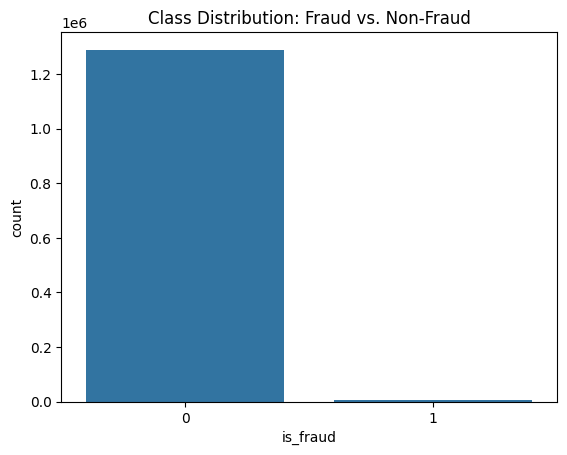

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [11]:
sns.countplot(x=data['is_fraud'])
plt.title("Class Distribution: Fraud vs. Non-Fraud")
plt.show()
print(data['is_fraud'].value_counts())

now we have 1289169 :not fraud and 7506 :Fraud

## Features/Attributes Exploration

In [12]:
import warnings
warnings.filterwarnings('ignore')
data['gender'] = data['gender'].map({'F': 0, 'M': 1})

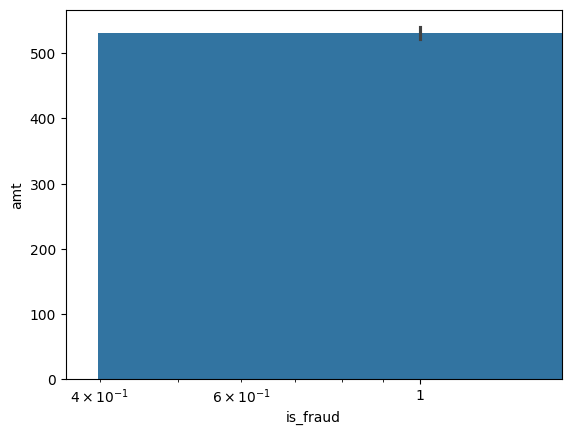

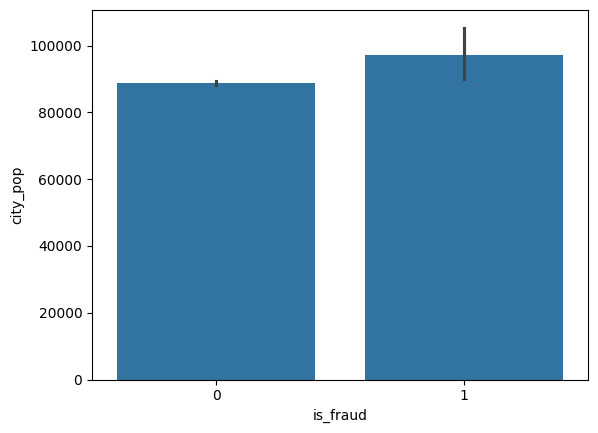

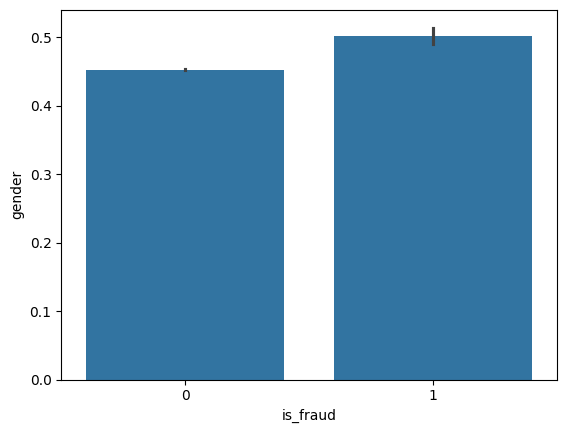

In [13]:
cols=['amt','city_pop','gender']
plt.xscale('log')

for i in cols:
    sns.barplot(data=data, x='is_fraud', y=i)
    plt.show()

# Feature Engineering

In [14]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

data['hour'] = data['trans_date_trans_time'].dt.hour
data['day'] = data['trans_date_trans_time'].dt.day
data['month'] = data['trans_date_trans_time'].dt.month
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


data[['trans_date_trans_time', 'hour', 'day', 'month', 'day_of_week', 'is_weekend']].head()

,trans_date_trans_time,hour,day,month,day_of_week,is_weekend
0,2019-01-01 00:00:18,0,1,1,1,0
1,2019-01-01 00:00:44,0,1,1,1,0
2,2019-01-01 00:00:51,0,1,1,1,0
3,2019-01-01 00:01:16,0,1,1,1,0
4,2019-01-01 00:03:06,0,1,1,1,0


In [15]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [16]:

data['distance'] = data.apply(lambda row: haversine(row['long'], row['lat'], row['merch_long'], row['merch_lat']), axis=1)


data[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head()


,lat,long,merch_lat,merch_long,distance
0,36.0788,-81.1781,36.011293,-82.048315,78.597568
1,48.8878,-118.2105,49.159047,-118.186462,30.212176
2,42.1808,-112.2620,43.150704,-112.154481,108.206083
3,46.2306,-112.1138,47.034331,-112.561071,95.673231
4,38.4207,-79.4629,38.674999,-78.632459,77.556744


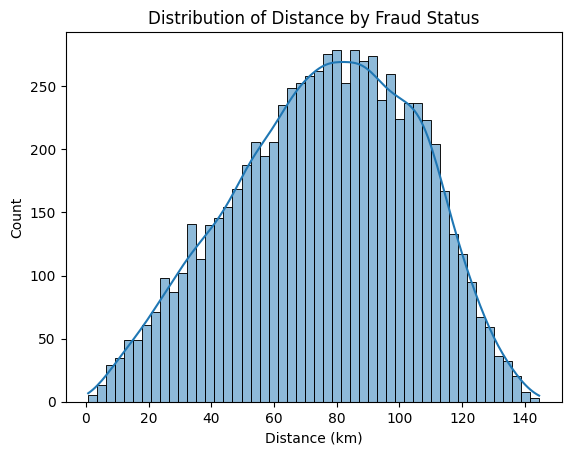

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data[data['is_fraud']==1], x='distance', bins=50, kde=True)
plt.title("Distribution of Distance by Fraud Status")
plt.xlabel("Distance (km)")
plt.ylabel("Count")
plt.show()


We can see most of the frauds lie between 20-120 kms
graph is left skewed so , we can say it occurs around the median distance most

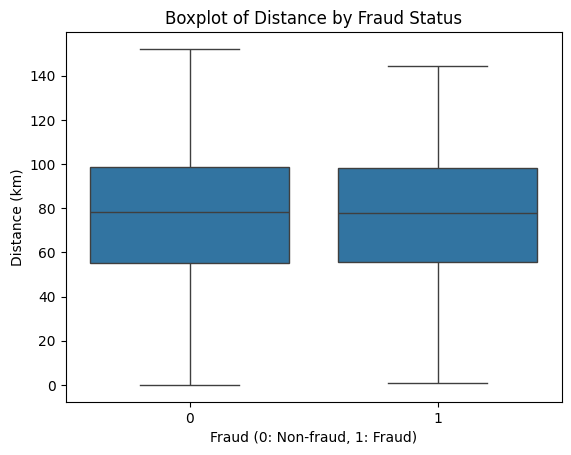

In [18]:
sns.boxplot(x='is_fraud', y='distance', data=data)
plt.title("Boxplot of Distance by Fraud Status")
plt.xlabel("Fraud (0: Non-fraud, 1: Fraud)")
plt.ylabel("Distance (km)")
plt.show()

In [19]:
data['dob'] = pd.to_datetime(data['dob'])
data['dob_day'] = data['dob'].dt.day
data['dob_month'] = data['dob'].dt.month
data['dob_year'] = data['dob'].dt.year

data[['dob','dob_day','dob_month','dob_year']]

,dob,dob_day,dob_month,dob_year
0,1988-03-09,9,3,1988
1,1978-06-21,21,6,1978
2,1962-01-19,19,1,1962
3,1967-01-12,12,1,1967
4,1986-03-28,28,3,1986
...,...,...,...,...
1296670,1961-11-24,24,11,1961
1296671,1979-12-11,11,12,1979
1296672,1967-08-30,30,8,1967
1296673,1980-08-18,18,8,1980


In [20]:
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month

# Fraud counts per year:
fraud_per_year = data[data['is_fraud'] == 1].groupby('year').size()
print(fraud_per_year)

# Fraud counts per month:
fraud_per_month = data[data['is_fraud'] == 1].groupby(['year', 'month']).size()
print(fraud_per_month)


year
2019    5220
2020    2286
dtype: int64
year  month
2019  1        506
      2        517
      3        494
      4        376
      5        408
      6        354
      7        331
      8        382
      9        418
      10       454
      11       388
      12       592
2020  1        343
      2        336
      3        444
      4        302
      5        527
      6        334
dtype: int64


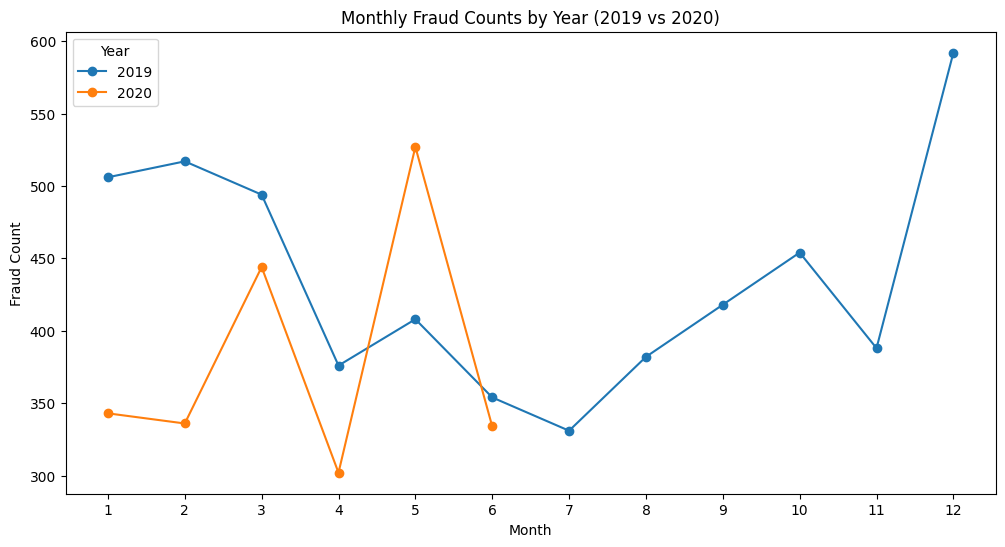

In [21]:
import matplotlib.pyplot as plt


fraud_monthly_counts = data[data['is_fraud'] == 1].groupby(['year', 'month']).size().reset_index(name='fraud_count')

plt.figure(figsize=(12, 6))


for year in sorted(fraud_monthly_counts['year'].unique()):
    subset = fraud_monthly_counts[fraud_monthly_counts['year'] == year]
    plt.plot(subset['month'], subset['fraud_count'], marker='o', label=f'{year}')

plt.title("Monthly Fraud Counts by Year (2019 vs 2020)")
plt.xlabel("Month")
plt.ylabel("Fraud Count")
plt.xticks(range(1, 13))
plt.legend(title="Year")
plt.show()


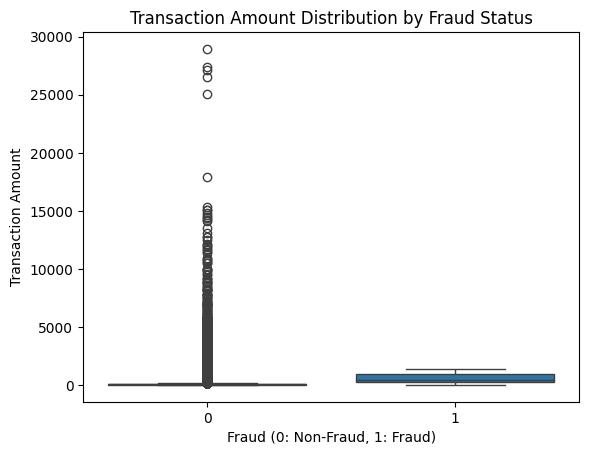

In [22]:
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel("Fraud (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

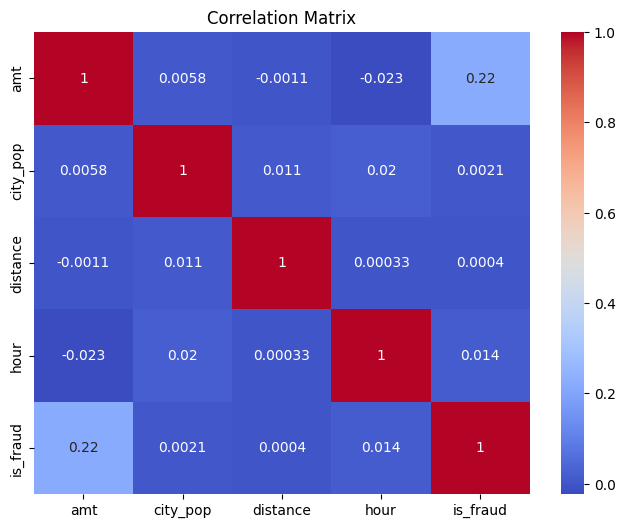

In [23]:
selected_cols = ['amt', 'city_pop', 'distance', 'hour', 'is_fraud']
corr_matrix = data[selected_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x = data.drop(columns=['is_fraud'])
y= data['is_fraud']

X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)
print("Training set class distribution:")
print(y_train.value_counts())
print("\nValidation set class distribution:")
print(y_val.value_counts())

Training set class distribution:
is_fraud
0    1031354
1       5986
Name: count, dtype: int64

Validation set class distribution:
is_fraud
0    257815
1      1520
Name: count, dtype: int64


COUNTER IMBALANCING

In [25]:
from imblearn.over_sampling import SMOTE
X_train_numeric = X_train.select_dtypes(include=[np.number])
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_numeric, y_train)
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_res.value_counts())

Before SMOTE:
is_fraud
0    1031354
1       5986
Name: count, dtype: int64

After SMOTE:
is_fraud
0    1031354
1    1031354
Name: count, dtype: int64


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


X_val_numeric = X_val.select_dtypes(include=[np.number])


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)


y_val_pred = model.predict(X_val_numeric)
y_val_proba = model.predict_proba(X_val_numeric)[:, 1]
y_train_pred=model.predict(X_train_numeric)
y_train_proba = model.predict_proba(X_train_numeric)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_val_proba))


print('-'*50)

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))
print("Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("ROC-AUC Score:", roc_auc_score(y_train, y_train_proba))

Confusion Matrix:
[[257815      0]
 [  1520      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

Accuracy Score: 0.9941388551487458
ROC-AUC Score: 0.5089789751321072
--------------------------------------------------
Confusion Matrix:
[[1031354       0]
 [   5986       0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1031354
           1       0.00      0.00      0.00      5986

    accuracy                           0.99   1037340
   macro avg       0.50      0.50      0.50   1037340
weighted avg       0.99      0.99      0.99   1037340

Accuracy Score: 0.9942294715329593
ROC-AUC Score: 0.4957533280669249

In [32]:
from sklearn.model_selection import train_test_split
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_res, y_train_res, test_size=0.9, random_state=42, stratify=y_train_res)
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Prepare LightGBM dataset
train_data = lgb.Dataset(X_train_res, label=y_train_res)

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'is_unbalance': True,
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1,
    'random_state': 42
}

model = lgb.train(params, train_data, num_boost_round=100)
y_val_proba = model.predict(X_val_numeric)
y_val_pred = (y_val_proba > 0.9).astype(int)

print("LightGBM Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nLightGBM Classification Report:")
print(classification_report(y_val, y_val_pred))
print("LightGBM ROC-AUC Score:", roc_auc_score(y_val, y_val_proba))


LightGBM Confusion Matrix:
[[255119   2696]
 [   393   1127]]

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257815
           1       0.29      0.74      0.42      1520

    accuracy                           0.99    259335
   macro avg       0.65      0.87      0.71    259335
weighted avg       0.99      0.99      0.99    259335

LightGBM ROC-AUC Score: 0.9755044659216063


In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

hidden_layer_archs = [
    (100,),
    (100, 50),
    (100, 50, 25),
    (50,),
    (50, 25)
]


for config in hidden_layer_archs:
    print("Evaluating MLP with hidden_layer_sizes =", config)
    mlp_model = MLPClassifier(hidden_layer_sizes=config, max_iter=300, random_state=42)


    mlp_model.fit(X_train_sample, y_train_sample)


    y_val_pred = mlp_model.predict(X_val_numeric)
    y_val_proba = mlp_model.predict_proba(X_val_numeric)[:, 1]


    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))
    print("Accuracy Score:", accuracy_score(y_val, y_val_pred))
    print("ROC-AUC Score:", roc_auc_score(y_val, y_val_proba))
    print("-------------------------------------------------\n")


Evaluating MLP with hidden_layer_sizes = (100,)
Confusion Matrix:
[[256606   1209]
 [  1502     18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    257815
           1       0.01      0.01      0.01      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

Accuracy Score: 0.9895463396764802
ROC-AUC Score: 0.5035763480953804
-------------------------------------------------

Evaluating MLP with hidden_layer_sizes = (100, 50)
Confusion Matrix:
[[256606   1209]
 [  1502     18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    257815
           1       0.01      0.01      0.01      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99     

In [33]:
X_train_sample_rf, _, y_train_sample_rf, _ = train_test_split(
X_train_res, y_train_res, test_size=0.9, random_state=42, stratify=y_train_res)

from sklearn.ensemble import RandomForestClassifier

rf_model_sample = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model_sample.fit(X_train_sample_rf, y_train_sample_rf)


y_val_pred_rf = rf_model_sample.predict(X_val_numeric)
y_val_proba_rf = rf_model_sample.predict_proba(X_val_numeric)[:, 1]


print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_val, y_val_pred_rf))
print("Random Forest Accuracy Score:", accuracy_score(y_val, y_val_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_val, y_val_proba_rf))


Random Forest Confusion Matrix:
[[253418   4397]
 [   221   1299]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257815
           1       0.23      0.85      0.36      1520

    accuracy                           0.98    259335
   macro avg       0.61      0.92      0.68    259335
weighted avg       0.99      0.98      0.99    259335

Random Forest Accuracy Score: 0.9821929164979659
Random Forest ROC-AUC Score: 0.985180888836038


In [35]:
import pandas as pd

importances = rf_model_sample.feature_importances_
features = X_train_sample_rf.columns


feat_importances = pd.DataFrame({'feature': features, 'importance': importances})


feat_importances = feat_importances.sort_values(by='importance', ascending=False)


print(feat_importances)


        feature  importance
1           amt    0.551298
10         hour    0.064453
7     unix_time    0.042590
18     dob_year    0.030951
6      city_pop    0.029658
0        cc_num    0.028298
11          day    0.026994
4           lat    0.025168
9    merch_long    0.023360
3           zip    0.023219
8     merch_lat    0.023217
5          long    0.022310
12        month    0.020306
13  day_of_week    0.020206
16      dob_day    0.020181
15     distance    0.019225
17    dob_month    0.015957
2        gender    0.005416
14   is_weekend    0.004147
19         year    0.003046


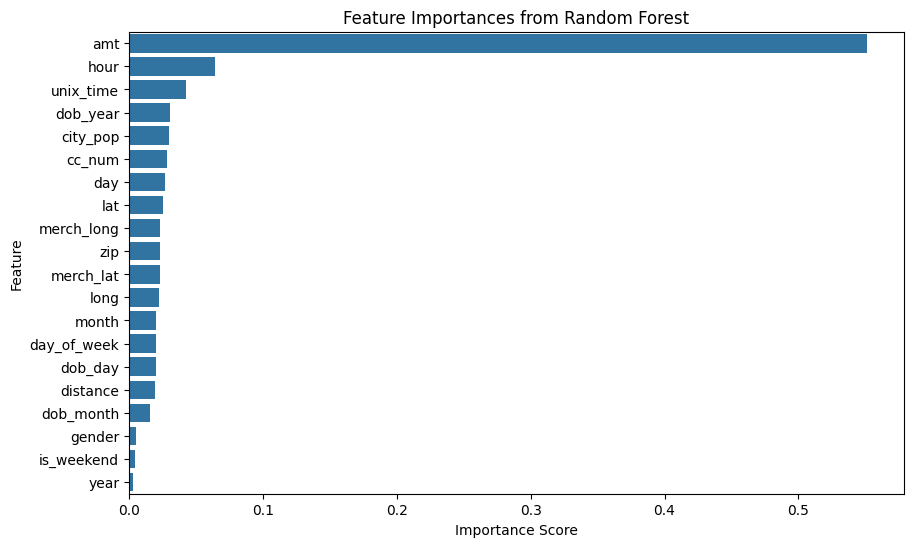

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_importances)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


## evaluating on test data

In [39]:
import os
# List all files in the dataset directory
print(os.listdir(kartik2112_fraud_detection_path))
import pandas as pd

# Construct the full file path (adjust the filename if needed)
file_path = os.path.join(kartik2112_fraud_detection_path, 'fraudTest.csv')
data_test = pd.read_csv(file_path)

# Verify by checking the first few rows
data_test.head()

['fraudTest.csv', 'fraudTrain.csv']


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [42]:
data_test.drop('Unnamed: 0',axis=1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [43]:
import warnings
warnings.filterwarnings('ignore')
data_test['gender'] = data_test['gender'].map({'F': 0, 'M': 1})

In [44]:
data_test['trans_date_trans_time'] = pd.to_datetime(data_test['trans_date_trans_time'])

data_test['hour'] = data_test['trans_date_trans_time'].dt.hour
data_test['day'] = data_test['trans_date_trans_time'].dt.day
data_test['month'] = data_test['trans_date_trans_time'].dt.month
data_test['day_of_week'] = data_test['trans_date_trans_time'].dt.dayofweek
data_test['is_weekend'] = data_test['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


data_test[['trans_date_trans_time', 'hour', 'day', 'month', 'day_of_week', 'is_weekend']].head()

,trans_date_trans_time,hour,day,month,day_of_week,is_weekend
0,2020-06-21 12:14:25,12,21,6,6,1
1,2020-06-21 12:14:33,12,21,6,6,1
2,2020-06-21 12:14:53,12,21,6,6,1
3,2020-06-21 12:15:15,12,21,6,6,1
4,2020-06-21 12:15:17,12,21,6,6,1


In [45]:

data_test['distance'] = data_test.apply(lambda row: haversine(row['long'], row['lat'], row['merch_long'], row['merch_lat']), axis=1)


data_test[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head()


,lat,long,merch_lat,merch_long,distance
0,33.9659,-80.9355,33.986391,-81.200714,24.561462
1,40.3207,-110.4360,39.450498,-109.960431,104.925092
2,40.6729,-73.5365,40.495810,-74.196111,59.080078
3,28.5697,-80.8191,28.812398,-80.883061,27.698567
4,44.2529,-85.0170,44.959148,-85.884734,104.335106


In [46]:
data_test['dob'] = pd.to_datetime(data_test['dob'])
data_test['dob_day'] = data_test['dob'].dt.day
data_test['dob_month'] = data_test['dob'].dt.month
data_test['dob_year'] = data_test['dob'].dt.year

data_test[['dob','dob_day','dob_month','dob_year']]

,dob,dob_day,dob_month,dob_year
0,1968-03-19,19,3,1968
1,1990-01-17,17,1,1990
2,1970-10-21,21,10,1970
3,1987-07-25,25,7,1987
4,1955-07-06,6,7,1955
...,...,...,...,...
555714,1966-02-13,13,2,1966
555715,1999-12-27,27,12,1999
555716,1981-11-29,29,11,1981
555717,1965-12-15,15,12,1965


In [48]:
from sklearn.model_selection import train_test_split
X= data_test.drop(columns=['is_fraud'])
y= data_test['is_fraud']

print("\ntest  set class distribution:")
print(y.value_counts())


test  set class distribution:
is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import numpy as np


X_numeric = X.select_dtypes(include=[np.number])


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_numeric, y)


y_pred = model.predict(X_numeric)
y_proba = model.predict_proba(X_numeric)[:, 1]

print("Test Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("\nTest Classification Report:")
print(classification_report(y, y_pred))
print("Test Accuracy Score:", accuracy_score(y, y_pred))
print("Test ROC-AUC Score:", roc_auc_score(y, y_proba))

Test Confusion Matrix:
[[553574      0]
 [  2145      0]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Test Accuracy Score: 0.9961401355721147
Test ROC-AUC Score: 0.5314760296816896


In [53]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix


X_train_numeric = X_train_res.select_dtypes(include=[np.number])

train_data = lgb.Dataset(X_train_numeric, label=y_train_res)

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'is_unbalance': True,
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1,
    'random_state': 42
}

import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

X
X_numeric = X.select_dtypes(include=[np.number])


y_proba = model.predict(X_numeric)

y_pred = (y_proba > 0.6).astype(int)

print("LightGBM Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("\nLightGBM Classification Report:")
print(classification_report(y, y_pred))
print("LightGBM ROC-AUC Score:", roc_auc_score(y, y_proba))


LightGBM Confusion Matrix:
[[553574      0]
 [  2145      0]]

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

LightGBM ROC-AUC Score: 0.3506181513958252
